# Probability and Data Analysis
## Computers Lab 1: Descriptive Statistics: Univariate and Bivariate Data

### Date: 16/02/2021

## Assignment

# The Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("topsongs.csv", delimiter=";")
data

,Column1,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


# QUESTION 1: 
### Compute the mean, median and variance for the variables *spch*, *acous* and *dur*. Compare their level of variability.




First we will look at all the data asked for the three variables rounded up to two decimals, and then we will compare their variability:

In [3]:
spch = data['spch']
dur = data['dur']
acous = data['acous']
info = {
    'C. Tendency': ["Mean", "Median", "Variance"],
    'SPCH': [round(spch.mean(), 2), round(spch.median(), 2), round(spch.var(), 2)],
    'DUR': [round(dur.mean(), 2), round(dur.median(), 2), round(dur.var(), 2)],
    'ACOUS': [round(acous.mean(), 2), round(acous.median(), 2), round(acous.var(), 2)]
}

df = pd.DataFrame(data=info)
df

,C. Tendency,SPCH,DUR,ACOUS
0,Mean,8.36,224.67,14.33
1,Median,5.00,221.00,6.00
2,Variance,56.00,1164.86,431.23


We can see that the variance of the variables is quite large in all cases, if we compare it to the magnitude of the mean. For SPCH, the variance is 56.0, meaning that the average square distance from all points to the mean is 56.0. Comparing this to the mean value of SPCH (8.36), we can see that the points are *very* spread out far from the mean value. Therefore, the variance is high. The same applies to both of the other two cases.

Comparing between variables, the highest variance occurs in DUR and the lowest in SPCH. However, this may be a misleading comparison, because the scale of the variables is clearly different, as we can see from the mean. Therefore, to have a more clear comparison, we can divide the variance by the mean to see which variable presents a higher variance/mean quotient (coefficient of variation):

In [4]:
print("SPCH: \n Coefficient of variation: " + str(round(data['spch'].var()/data['spch'].mean(), 2)))
print("DUR: \n Coefficient of variation: " + str(round(data['dur'].var()/data['dur'].mean(), 2)))
print("ACOUS: \n Coefficient of variation: " + str(round(data['acous'].var()/data['acous'].mean(), 2)))

SPCH: 
 Coefficient of variation: 6.7
DUR: 
 Coefficient of variation: 5.18
ACOUS: 
 Coefficient of variation: 30.1


Clearly, ACOUS has the largest variance in relation to its mean, and DUR has the smallest variance in relation to its mean. So, the variance and the coefficient of variation lead to very different conclusions.

# QUESTION 2:
## Which songs presents the highest and lowest value of *val*?

The song with a maximum *val* is, and has a value of:

In [5]:
max_val = data['val'].max()
max_val_song = data.set_index('val').at[max_val, 'title']

print("The song with the highest val, of " + str(max_val) + ", is"+ " \"" + max_val_song + "\"")



The song with the highest val, of 98, is "Mmm Yeah (feat. Pitbull)"


The song with a minimum *val* is, and has a value of:

In [6]:
min_val = data['val'].min()
min_val_song = data.set_index('val').at[min_val, 'title']

print("The song with the lowest val, of " + str(min_val) + ", is"+ " \"" + min_val_song + "\"")

The song with the lowest val, of 0, is "Million Years Ago"


# QUESTION 3
## Which percentage of songs exhibit more than 0.9 in *dnce*? Which value of *dnce* is exceeded by 35% of the songs?


Percentage of songs that exhibited more than 0.9 in dnce rounded to two decimal places:

In [7]:
#condition = to exhibit more than 0.9 in dnce

songs_condition = data.drop(data[data['dnce']<=0.9].index) 

p = 100*songs_condition['title'].count()/data['title'].count()

print(str(round(p, 2)) + "% of the songs have a dnce value larger than 0.9")



99.83% of the songs have a dnce value larger than 0.9


Value of dnce surpassed by 35% of the songs:

In [8]:
print(str(data['dnce'].quantile(1-.35)) + " is the value of dnce exceeded by 35% of the songs")

70.0 is the value of dnce exceeded by 35% of the songs


# QUESTION 4
## Obtain a box plot for the variable *dur*. Are there any outliers? If yes, which are these songs?


Down below we can see a box plot of the variable *dur*:

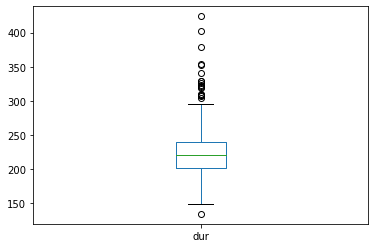

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
data['dur'].plot.box()
plt.show()

Next, we will see if there are any outliers (although we can already see from the boxplot that there clearly are). First we will analyze the upper outliers and then the lower ones:

In [10]:
#Outliers are values below the value of Q1 − 1.5 · IQR and above the value of Q3 + 1.5 · IQR, where IQR = Q3-Q1
q3 = data['dur'].quantile(.75)
q1 = data['dur'].quantile(.25)
iqr = q3-q1

top_outlier_boundary = q3 + 1.5*iqr
bottom_outlier_boundary = q1 - 1.5*iqr

top_outliers = data.drop(data[data['dur']<=top_outlier_boundary].index)

print("The boundary for the upper outliers is: " + str(top_outlier_boundary) + ", and in total there are " + str(top_outliers['title'].count()) + ", which are shown in the following table:")

top_outliers



The boundary for the upper outliers is: 295.75, and in total there are 18, which are shown in the following table:


,Column1,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
17,18,The Time (Dirty Bit),The Black Eyed Peas,dance pop,2010,128,81,82,-8,60,44,308,7,7,70
48,49,Castle Walls (feat. Christina Aguilera),T.I.,atl hip hop,2010,80,86,45,-5,26,58,329,7,39,49
63,64,Monster,Kanye West,chicago rap,2011,125,69,63,-6,67,10,379,0,20,73
76,77,The Edge Of Glory,Lady Gaga,dance pop,2011,128,77,58,-6,11,36,321,0,4,67
81,82,You And I,Lady Gaga,dance pop,2011,127,70,52,-5,9,52,307,9,5,64
95,96,Castle Walls (feat. Christina Aguilera),T.I.,atl hip hop,2011,80,86,45,-5,26,58,329,7,39,49
162,163,Lose Yourself to Dance,Daft Punk,electro,2013,100,66,83,-8,8,67,354,8,6,72
172,173,Suit & Tie,Justin Timberlake,dance pop,2013,102,60,80,-4,16,36,326,10,22,68
188,189,TKO,Justin Timberlake,dance pop,2013,138,68,61,-7,43,49,424,1,24,58
194,195,Take Back the Night,Justin Timberlake,dance pop,2013,107,66,59,-5,64,33,353,4,16,54


In [11]:
bottom_outliers = data.drop(data[data['dur']>=bottom_outlier_boundary].index)

print("The boundary for the lower outliers is: " + str(bottom_outlier_boundary) + ", and the " + str(bottom_outliers['title'].count()) +" lower outlier is shown in the table below: \n") 
bottom_outliers

The boundary for the lower outliers is: 145.75, and the 1 lower outlier is shown in the table below: 



,Column1,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
330,331,Mark My Words,Justin Bieber,canadian pop,2015,114,26,38,-9,17,52,134,88,3,63


# QUESTION 5
## Obtain an histogram for the variable *dur*. What can you say about the shape of the distribution?

Here is the histogram:

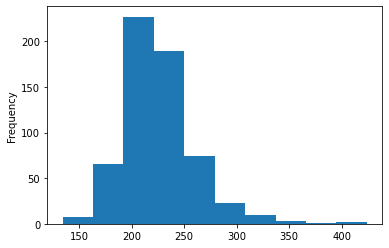

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
data['dur'].plot.hist()

plt.show()

About the shape of the histogram we can see that it is more or less symetric, which we can check by comparing the mean and median for the variable *dur*.

Please notice that when comparing these values we are considering that if the difference between the mean and the median is smaller than 1/50 of the mean, the distribution will be symmetric.


In [13]:
x = data['dur'].mean()
M = data['dur'].median()

print("The value for the mean is: "+str(round(x, 2))+", while for the median is "+str(round(M, 2)))


if (abs(x-M) <= x/50 ):
  print ("As we can see they are very close values, so the histogram is symetric.")
if (x-M > x/50 ):
  print ("As we can see the mean is greater than the median, so it is right-skewed.")
if (x-M < -x/50 ):
  print ("As we can see the median is greater than the mean, so it is left-skewed.")

The value for the mean is: 224.67, while for the median is 221.0
As we can see they are very close values, so the histogram is symetric.


# QUESTION 6
## Plot the *val* (axis X) versus the *pop* position (axis Y). The observations correspoinding to the artist "Lady Gaga" should appear in red color.

Here is the plot (the observations corresponding to Lady Gaga are shown in red):

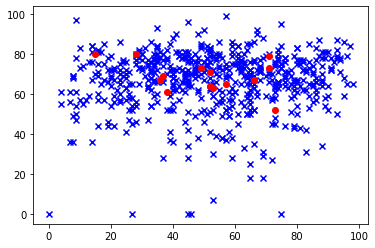

In [14]:
plt.scatter(data['val'][data['artist'] != 'Lady Gaga'], data['pop'][data['artist'] != 'Lady Gaga'], marker = 'x', color = 'b')
plt.scatter(data['val'][data['artist'] == 'Lady Gaga'], data['pop'][data['artist'] == 'Lady Gaga'], marker = 'o', color = 'r')
#this way we are adding one scatter plot to the other, resulting in the following combined graph.


# QUESTION 7
## Obtain a frequency table that summarizes the number of songs per year. Create a bar chart.

Here is the frequency table:

In [15]:
tab = pd.crosstab(index = data['year'], columns = 'count')

print("The frequency table is: ")
tab


The frequency table is: 


col_0,count
year,
2010,51
2011,53
2012,35
2013,71
2014,58
2015,95
2016,80
2017,65
2018,64


Here is the bar chart:

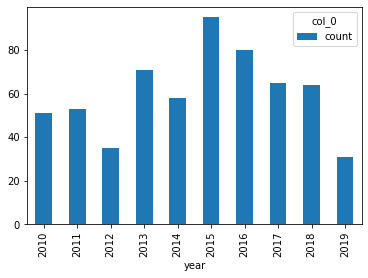

In [16]:
tab.plot.bar()
plt.show()

# QUESTION 8
## Identify the songs of Adele. Create a pie chart taking into acount the year.



These are the songs of Adele:

In [17]:
adele_songs = data.drop(data[data['artist'] != 'Adele'].index) 

print("Adele has "+ str(adele_songs['title'].count()) +" songs in the list, which are the following ones: ")
adele_songs

Adele has 10 songs in the list, which are the following ones: 


,Column1,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
52,53,Someone Like You,Adele,british soul,2011,135,33,56,-8,10,28,285,89,3,80
55,56,Rolling in the Deep,Adele,british soul,2011,105,76,73,-5,5,52,228,13,3,76
112,113,Set Fire to the Rain,Adele,british soul,2012,108,68,61,-4,13,47,242,0,3,76
295,296,Hello,Adele,british soul,2015,158,45,48,-6,9,29,295,34,3,73
398,399,All I Ask,Adele,british soul,2016,142,28,59,-5,15,34,272,88,3,71
417,418,Send My Love (To Your New Lover),Adele,british soul,2016,164,52,69,-8,17,56,223,4,10,61
420,421,When We Were Young,Adele,british soul,2016,144,59,38,-6,9,27,291,35,5,58
442,443,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0
473,474,All I Ask,Adele,british soul,2017,142,28,59,-5,15,34,272,88,3,71
504,505,Water Under the Bridge,Adele,british soul,2017,95,84,60,-7,11,47,240,2,7,49


We can express this data in a pie chart taking into account the year:

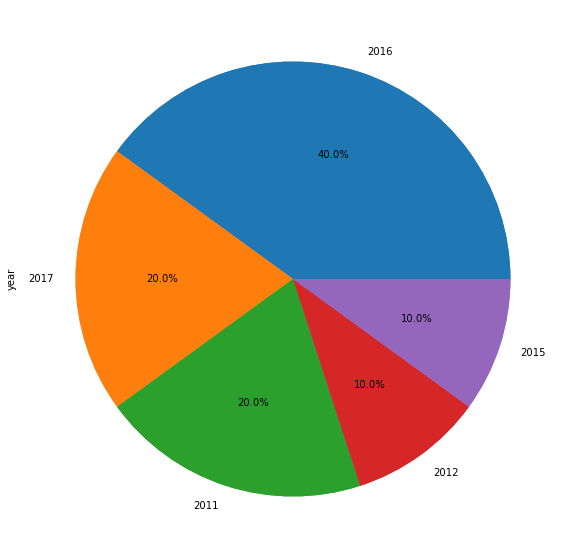

In [18]:
plot = adele_songs['year'].value_counts().plot.pie(y='songs', figsize=(10, 10)) #define plot

x = adele_songs['year'].value_counts() #specify data values
plt.pie(x, autopct='%1.1f%%') #show percentages
plt.show() #plot

